In [905]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
import sklearn.preprocessing
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [948]:
df = pd.read_csv('../dataset_diabetes/diabetic_data.csv')
# check missing values
df = df.replace('?',np.nan)
# df[df.columns].isnull().sum()
# df.info()
print(len(df))

101766


In [949]:
df = df.groupby('patient_nbr').first()
df.head()
# df.groupby('number_inpatient').size()
# df.loc[df.readmitted == '<30',['discharge_disposition_id', 'readmitted']]
# df.loc[df.number_inpatient == 0, ['readmitted']].groupby('readmitted').size()
# print(len(df))

,encounter_id,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
patient_nbr,,,,,,,,,,,,,,,,,,,,,
135,24437208,Caucasian,Female,[50-60),NaN,2,1,1,8,NaN,...,No,Steady,No,No,No,No,No,Ch,Yes,<30
378,29758806,Caucasian,Female,[50-60),NaN,3,1,1,2,NaN,...,No,No,No,No,No,No,No,No,No,NO
729,189899286,Caucasian,Female,[80-90),NaN,1,3,7,4,MC,...,No,No,No,No,No,No,No,No,Yes,NO
774,64331490,Caucasian,Female,[80-90),NaN,1,1,7,3,NaN,...,No,No,No,No,No,No,No,Ch,Yes,NO
927,14824206,AfricanAmerican,Female,[30-40),NaN,1,1,7,5,NaN,...,No,No,No,No,No,No,No,No,Yes,NO


In [934]:
df = df.loc[~df['discharge_disposition_id'].isin([11,13,14,19,20,21])]
# df = df['discharge_disposition_id']
# print(df)
# df.head()
# data_df = df['A1Cresult']
# data_df = data_df[data_df.notnull()]

# print(data_df)
print(len(df))

69973


In [950]:
# # Coverd categorical data to numeric value
# labelencoder = sklearn.preprocessing.LabelEncoder()
# df['readmitted'] = labelencoder.fit_transform(df.readmitted)
# df['age'] = labelencoder.fit_transform(df.age)
# df['weight'] = df.weight.fillna(str(0))
# df['weight'] = labelencoder.fit_transform(df.weight)
# df['race'] = df.race.fillna(str(0))
# df['race'] = labelencoder.fit_transform(df.race)
# df['gender'] = labelencoder.fit_transform(df.gender)


# print(df.gender.unique())
# df.head()


In [916]:
for c in list(df.columns[:]):
    d = df[c]
    n = d.unique()
    print('Feature and unique values: ' + c + ', ' +str(len(n)) + ', ' + str(d.dtypes))

Feature and unique values: encounter_id, 69973, int64
Feature and unique values: race, 6, object
Feature and unique values: gender, 3, object
Feature and unique values: age, 10, object
Feature and unique values: weight, 10, object
Feature and unique values: admission_type_id, 8, int64
Feature and unique values: discharge_disposition_id, 21, int64
Feature and unique values: admission_source_id, 17, int64
Feature and unique values: time_in_hospital, 14, int64
Feature and unique values: payer_code, 18, object
Feature and unique values: medical_specialty, 71, object
Feature and unique values: num_lab_procedures, 116, int64
Feature and unique values: num_procedures, 7, int64
Feature and unique values: num_medications, 75, int64
Feature and unique values: number_outpatient, 33, int64
Feature and unique values: number_emergency, 18, int64
Feature and unique values: number_inpatient, 13, int64
Feature and unique values: diag_1, 695, object
Feature and unique values: diag_2, 724, object
Feature

In [918]:
df.groupby('diag_1').size().sort_values(ascending = False)

diag_1
414       5209
428       3876
786       3040
410       2774
486       2362
427       2019
715       1907
434       1514
682       1463
780       1409
491       1313
276       1180
996       1106
250.8     1074
38         998
599        975
584        918
820        815
574        773
435        752
562        709
577        682
493        676
722        660
V57        654
296        634
250.6      631
440        609
433        608
518        562
          ... 
250.51       1
669          1
870          1
216          1
217          1
219          1
848          1
842          1
84           1
839          1
838          1
229          1
837          1
834          1
833          1
832          1
826          1
817          1
803          1
75           1
720          1
704          1
703          1
700          1
691          1
690          1
684          1
674          1
671          1
10           1
Length: 694, dtype: int64

In [952]:
labelencoder = sklearn.preprocessing.LabelEncoder()
for c in list(df.columns[1:]):
    d = df[c]
    if d.dtypes == 'object':
        if d.isnull().sum() == 0:     # if No missing value and Object
            if len(d.unique()) < 40:  # if 
                df[c] = labelencoder.fit_transform(d)
            else:
                de = labelencoder.fit_transform(d)
                dc = pd.cut(de, 40)
                df[c] = labelencoder.fit_transform(dc)       
        else:  # If missing value and Object
            if len(d.unique()) < 40:   
                df[c] = d.fillna(str(0))
                df[c] = labelencoder.fit_transform(d)
            else:
                de = d.fillna(str(0))
                de = labelencoder.fit_transform(de)
                dc = pd.cut(de, 40)
                df[c] = labelencoder.fit_transform(dc)
    else:
        if d.isnull().sum() == 0:     # if No missing value 
            if len(d.unique()) > 40:  #  
                dc = pd.cut(de, 40)
                df[c] = labelencoder.fit_transform(dc)       
        else:  # If missing value
            if len(d.unique()) > 40:
                dc = pd.cut(de, 40)
                df[c] = labelencoder.fit_transform(dc)



# df.groupby('diag_1').size()
# df.diag_2.unique()
# df[df.columns].isnull().sum()
# df.head()
# df['diag_1'] = df['diag_1'].fillna(str(0))
# df['diag_1'] = labelencoder.fit_transform(df.diag_1)
# df['diag_1'] = pd.cut(df.diag_1, 30)
# # df['diag_01']
# df['diag_1'] = labelencoder.fit_transform(df.diag_1)
# df.groupby('number_outpatient').size()
df.head()

,encounter_id,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
patient_nbr,,,,,,,,,,,,,,,,,,,,,
135,24437208,3,0,5,0,2,1,1,8,0,...,0,2,1,0,0,0,0,0,1,0
378,29758806,3,0,5,0,3,1,1,2,0,...,0,1,1,0,0,0,0,1,0,2
729,189899286,3,0,8,0,1,3,7,4,8,...,0,1,1,0,0,0,0,1,1,2
774,64331490,3,0,8,0,1,1,7,3,0,...,0,1,1,0,0,0,0,0,1,2
927,14824206,1,0,3,0,1,1,7,5,0,...,0,1,1,0,0,0,0,1,1,2


In [922]:
df.groupby('num_lab_procedures').size().sort_values(ascending = False)

num_lab_procedures
0     32014
13    10975
8      5240
6      4433
2      4426
43     2315
19     1233
20     1063
14     1033
36      960
32      657
35      648
17      624
49      586
42      501
9       494
45      419
48      382
24      293
29      289
18      221
26      147
22      122
11      118
7       106
47       93
41       89
31       73
12       70
34       59
37       44
40       43
21       38
10       31
46       29
16       18
38       14
23       10
27       10
4         9
44        8
30        8
3         7
1         7
28        6
25        3
39        2
15        1
5         1
33        1
dtype: int64

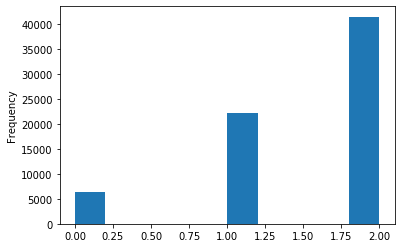

In [927]:
# df.hist()
df['readmitted'].plot(kind='hist')

In [929]:
df.groupby('readmitted').size()

readmitted
0     6277
1    22222
2    41474
dtype: int64

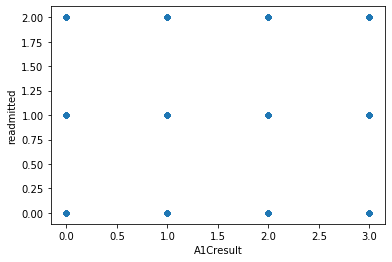

In [354]:
df.plot.scatter('A1Cresult', 'readmitted')

In [837]:
def model_logistic(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
    scaler = sklearn.preprocessing.StandardScaler().fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)
    model = LogisticRegression(multi_class='multinomial',solver ='newton-cg').fit(X_train,y_train)
#     model = LogisticRegression(multi_class='ovr',solver ='newton-cg').fit(X_train,y_train)
    # predictions = model.predict(X_test)
    accuracy = model.score(X_test, y_test)
    return model, accuracy
    

In [809]:
def model_randomForest(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
    scaler = sklearn.preprocessing.StandardScaler().fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)
    model = RandomForestClassifier(max_depth = 10).fit(X_train,y_train)
    # predictions = model.predict(X_test)
    accuracy = model.score(X_test, y_test)
    return model, accuracy

In [957]:
def plot_importance_lg(model, features):
    feature_importances = pd.DataFrame(model.coef_[0]+model.coef_[1], 
                                       index = features, columns=['importance']).sort_values('importance', ascending=False)
    num = len(feature_importances)
    ylocs = np.arange(num)
    values_to_plot = feature_importances.iloc[:num].values.ravel()[::-1]
    feature_labels = list(feature_importances.iloc[:num].index)[::-1]

    plt.figure(num=None, figsize=(8, 15), dpi=80, facecolor='w', edgecolor='k');
    plt.barh(ylocs, values_to_plot, align = 'center')
    plt.ylabel('Features')
    plt.xlabel('Importance Score')
    plt.title('Feature Importance Score - Logistic Regression')
    plt.yticks(ylocs, feature_labels)
    plt.show()

In [811]:
def plot_importance_rdf(model, features):
    feature_importances = pd.DataFrame(model.feature_importances_,
                                   index = features,columns=['importance']).sort_values('importance',ascending=False)
    num = len(feature_importances)
    ylocs = np.arange(num)
    values_to_plot = feature_importances.iloc[:num].values.ravel()[::-1]
    feature_labels = list(feature_importances.iloc[:num].index)[::-1]

    plt.figure(num=None, figsize=(8, 15), dpi=80, facecolor='w', edgecolor='k');
    plt.barh(ylocs, values_to_plot, align = 'center')
    plt.ylabel('Features')
    plt.xlabel('Importance Score')
    plt.title('Feature Importance Score - RandomForest')
    plt.yticks(ylocs, feature_labels)
    plt.show()

In [812]:
def plot_correlation_matrix(data):
    corrMatrix = data.corr()
    sn.heatmap(corrMatrix, annot=True)
    plt.show()

In [936]:
#### X = df.iloc[:, 2:49]
# features = df.columns[2:49]
features = ['race', 'gender', 'age', 'admission_type_id',
            'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
            'num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient',
            'number_emergency', 'number_inpatient', 'diag_1', 'diag_2', 'diag_3',
            'number_diagnoses', 'max_glu_serum', 'A1Cresult', 'metformin',
            'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
            'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
            'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
            'tolazamide', 'insulin', 'glyburide-metformin', 'glipizide-metformin', 
            'metformin-rosiglitazone', 'metformin-pioglitazone', 'change', 'diabetesMed']

X = df[features]
y = df['readmitted']
# X.head()

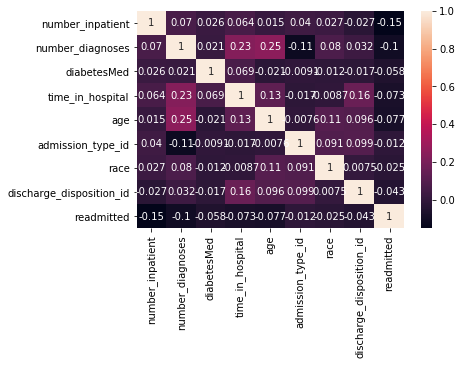

In [886]:
cor_fe = ['number_inpatient', 'number_diagnoses', 'diabetesMed', 'time_in_hospital', 
          'age', 'admission_type_id', 'race', 'discharge_disposition_id', 'readmitted']
plot_correlation_matrix(df[cor_fe])

In [744]:
# scatter_matrix(df[cor_fe])
# plt.show()

In [937]:
model_lg, accuracy = model_logistic(X, y)
print(accuracy)

0.5997522865853658


In [831]:
model_lg.intercept_

array([-1.08542018,  0.22768113,  0.85773905])

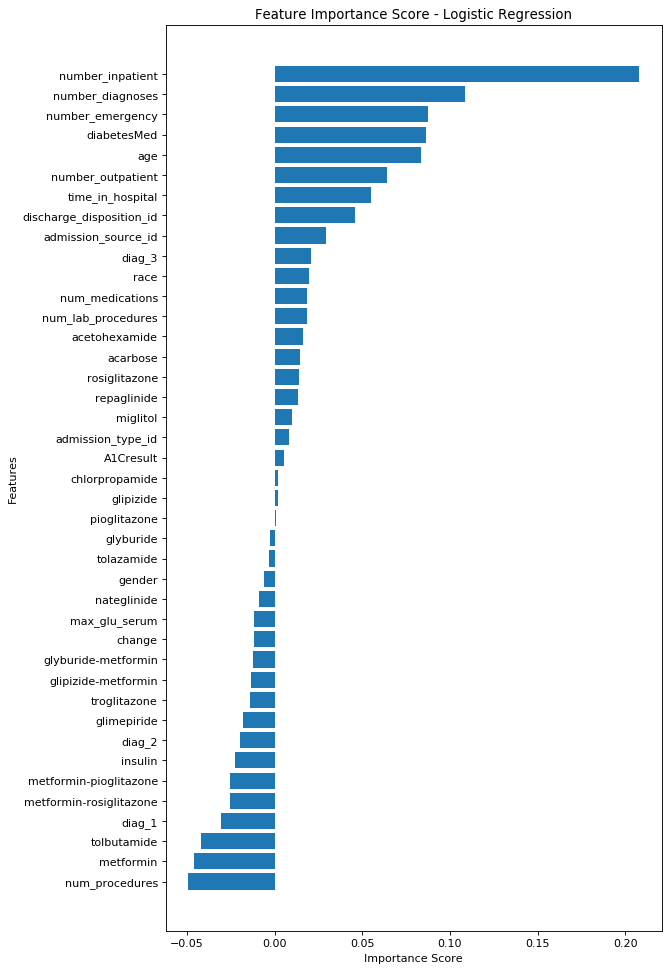

In [958]:
plot_importance_lg(model_lg, features)

In [939]:
model_rdf, accuracy = model_randomForest(X, y)
print(accuracy)

C:\Users\User-pc\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.6035012504465881


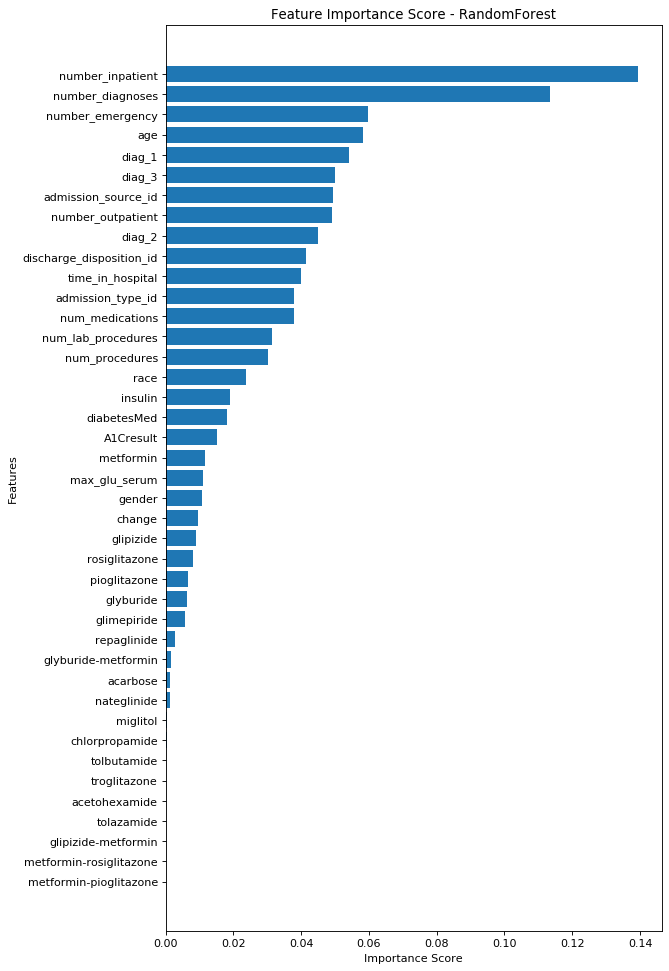

In [940]:
plot_importance_rdf(model_rdf, features)

In [960]:
# Check which inpatient impotency
add_new_feature = pd.get_dummies(df['number_inpatient'], drop_first = False, prefix='number_inpatient')

old_features = ['race', 'gender', 'age','admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'num_lab_procedures',
       'num_procedures', 'num_medications', 'number_outpatient',
       'number_emergency', 'diag_1', 'diag_2', 'diag_3',
       'number_diagnoses', 'max_glu_serum', 'A1Cresult', 'metformin',
       'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
       'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed']

df_new = pd.concat([df[old_features], add_new_feature], axis = 1)
X_new = df_new
y_new = df['readmitted']
# df_new.groupby('number_inpatient_0').size()
# df_new.head()

In [961]:
model_lg_new, accuracy = model_logistic(X_new, y_new)
print(accuracy)

0.6073359433258763


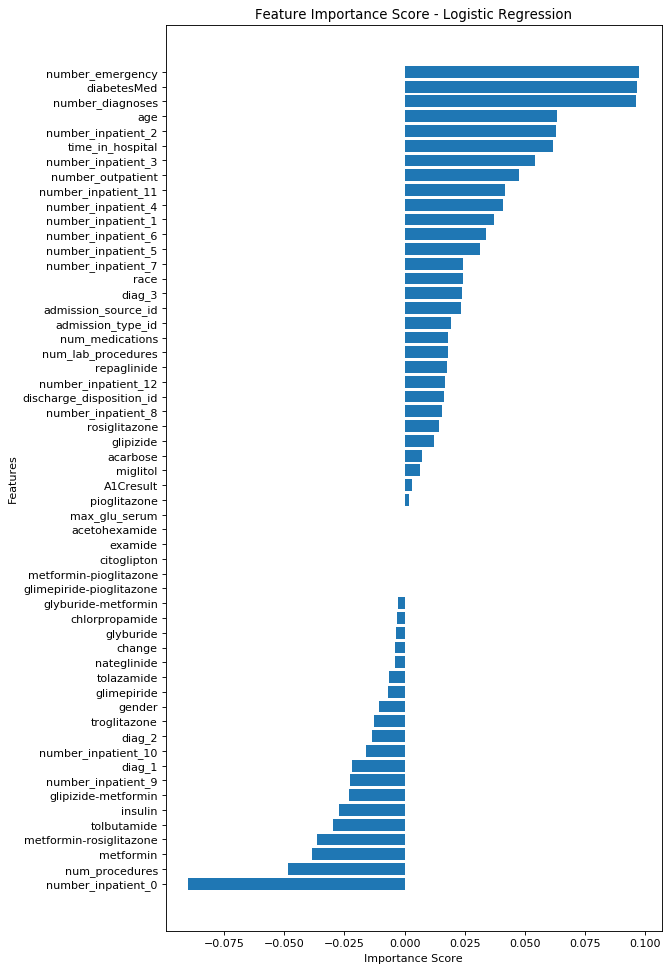

In [962]:
plot_importance_lg(model_lg_new, df_new.columns)

In [944]:
model_rdf_new, accuracy = model_randomForest(X_new, y_new)
print(accuracy)

C:\Users\User-pc\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.6040728831725616


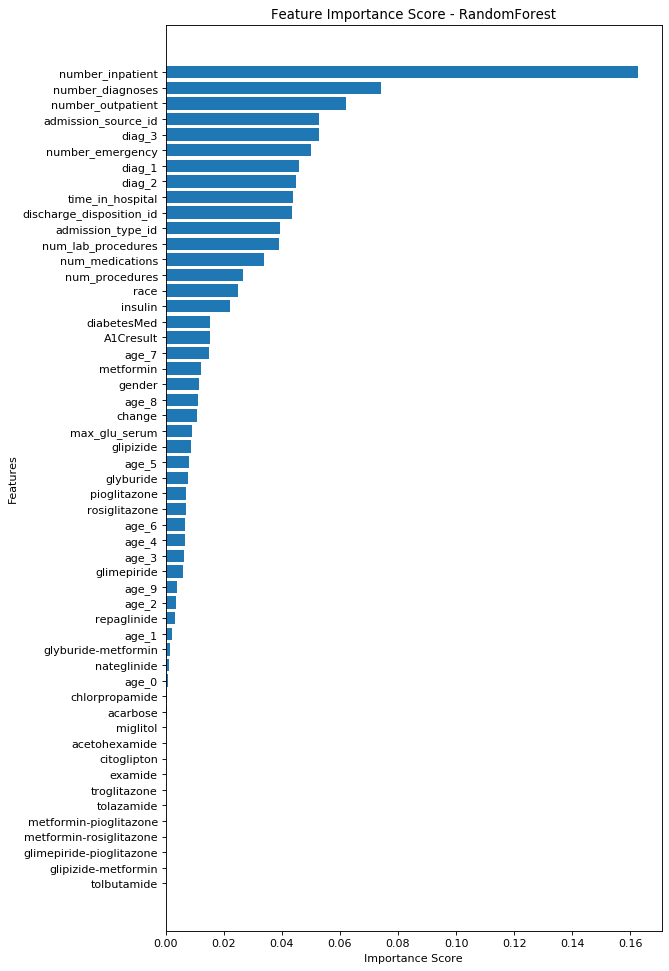

In [945]:
plot_importance_rdf(model_rdf_new, df_new.columns)